In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("emineyetm/fake-news-detection-datasets")

print("Path to dataset files:", path)

Path to dataset files: /Users/shreeyachand/.cache/kagglehub/datasets/emineyetm/fake-news-detection-datasets/versions/1


In [2]:
import pandas as pd
fake_df = pd.read_csv(path+'/News _dataset/Fake.csv')
fake_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [3]:
true_df = pd.read_csv(path+'/News _dataset/True.csv')
true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [6]:
len(set(fake_df['date']))

1681

In [7]:
len(set(true_df['date']))

716

In [26]:
import random

In [80]:
index = random.choice(range(len(fake_df)))
print(fake_df.iloc[index]['title'])
print(fake_df.iloc[index]['text'])

OBAMA WARNS COPS TO RECOGNIZE BLACK LIVES MATTER: “If police organizations acknowledge that there’s a problem…that is what is going to ultimately make the job of being a cop a lot safer” [VIDEO]
Watch Barack Obama identify himself as the leader of the Black Lives Matter terror group in video below: In a movement like Black Lives Matter, there s always gonna be folks who say things that are stupid or imprudent. And I don t think you can hold well-meaning activists who are doing the right thing and peacefully protesting responsible for everything that is uttered at a protest site. I would just say that everyone who s concerned about police shootings or racial bias in the criminal justice system that maintaining a truthful and serious and respectful tone is going to help mobilize American society to bring about real change. And that is OUR ultimate objective. Spoken like a true leader of a radical, disruptive, chaotic movement There are legitimate issues that have been raised. And there s

In [48]:
index = random.choice(range(len(true_df)))
print(true_df.iloc[index]['title'])
print(true_df.iloc[index]['text'])

Super Tuesday showdown: How the South won the spotlight
ATLANTA (Reuters) - Things were not looking too good a year ago for Georgia’s top elections officer as he tried to stitch together a mega-presidential primary in the U.S. South. Efforts to bring Alabama and Arkansas online had stalled. Tennessee was threatening to defect.  But Georgia Secretary of State Brian Kemp kept working the phones, arguing that a bloc of Southern states all voting on March 1 was the only way to make U.S. presidential candidates pay attention to the region.  Eventually key state leaders came around and their effort seems to have paid off.  Candidates have campaigned more in the South this election year in an effort to woo a group of states voting early on so-called Super Tuesday than Kemp can recall seeing in any contemporary primary. And the seven states holding contests in the region appear poised to play a pivotal role in selecting the Republican and Democratic nominees for the Nov. 8 race. “In years past

## *Observations:*
- some fake news is quite short
- all real text begins with CITY (Outlet) -
- difference in capitalization

In [60]:
true_txt = true_df['text'].str.cat(sep=' ')
fake_txt = fake_df['text'].str.cat(sep=' ')

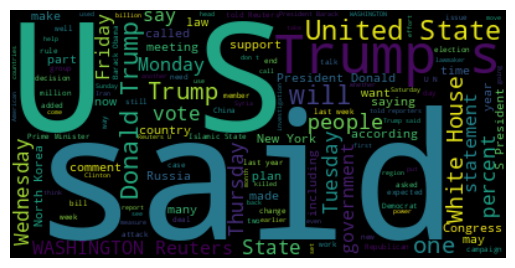

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(true_txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

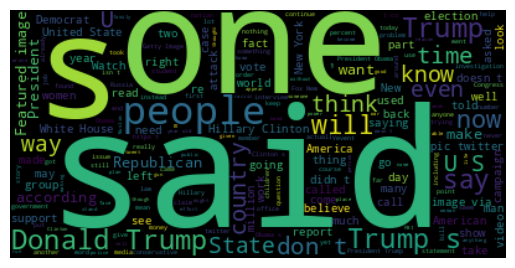

In [62]:
wordcloud = WordCloud().generate(fake_txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

- can it generalize for news topics post-2017?

In [6]:
pd.concat([true_df, fake_df])

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [58]:
''.join(true_df.iloc[20300]['text'].split('-')[1:]).strip()

'Nothing has been formally agreed with the European Union on moving the next round of Brexit negotiations, British Prime Minister Theresa May s spokeswoman said on Tuesday.     Earlier, diplomats in Brussels said the EU and Britain had agreed to delay the talks by a week to Sept. 25 on expectations that May would make an important speech on the subject on Brexit on Sept. 21.  The latest position on this from our perspective was that both sides said they were keen to be flexible, but we hadn t formally agreed anything,  the spokeswoman said.'

In [59]:
true_df.iloc[20300]['text']

'LONDON (Reuters) - Nothing has been formally agreed with the European Union on moving the next round of Brexit negotiations, British Prime Minister Theresa May s spokeswoman said on Tuesday.     Earlier, diplomats in Brussels said the EU and Britain had agreed to delay the talks by a week to Sept. 25 on expectations that May would make an important speech on the subject on Brexit on Sept. 21.  The latest position on this from our perspective was that both sides said they were keen to be flexible, but we hadn t formally agreed anything,  the spokeswoman said. '

In [65]:
def clean_true(text):
    return ''.join(text.split('-')[1:]).strip()

def clean_fake(text):
    return text.strip()

In [66]:
true_df['text_clean'] = true_df['text'].apply(clean_true)
fake_df['text_clean'] = fake_df['text'].apply(clean_fake)

In [70]:
true_df['label'] = 1
fake_df['label'] = 0

In [72]:
cols = ['text_clean', 'label']

In [76]:
full_df = pd.concat([true_df[cols], fake_df[cols]]).reset_index()
full_df.rename({'index': 'orig_index'}, axis=1, inplace=True)
full_df

,orig_index,text_clean,label
0,0,The head of a conservative Republican faction ...,1
1,1,Transgender people will be allowed for the fir...,1
2,2,The special counsel investigation of links bet...,1
3,3,Trump campaign adviser George Papadopoulos tol...,1
4,4,President Donald Trump called on the U.S. Post...,1
...,...,...,...
44893,23476,21st Century Wire says As 21WIRE reported earl...,0
44894,23477,21st Century Wire says It s a familiar theme. ...,0
44895,23478,Patrick Henningsen 21st Century WireRemember ...,0
44896,23479,21st Century Wire says Al Jazeera America will...,0


In [77]:
full_df.to_csv('news-clean.csv')

- include title??
    - are there special tokens that could indicate title/text